In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

  0%|          | 0/8 [00:00<?, ?it/s]

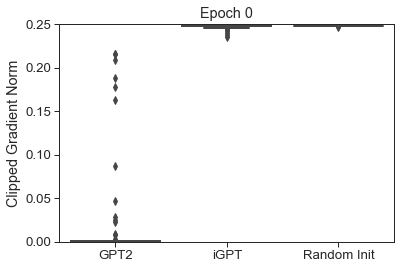

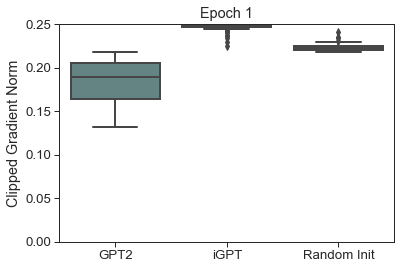

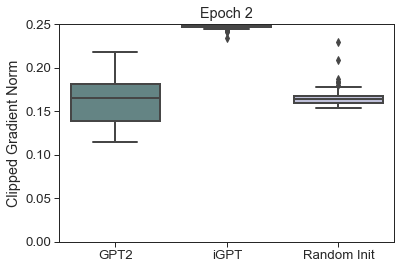

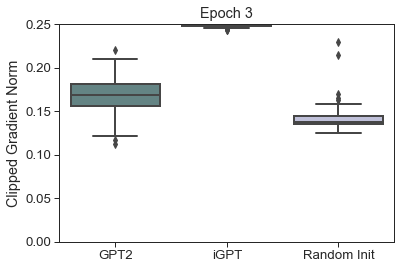

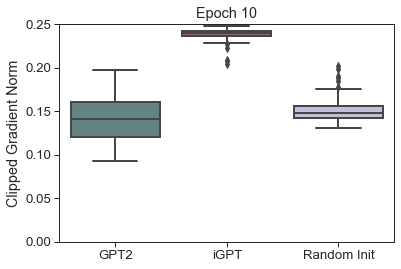

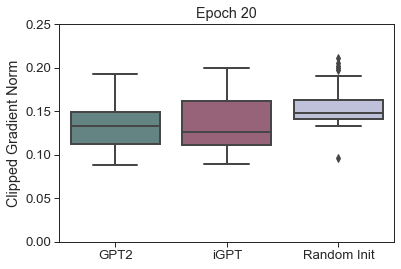

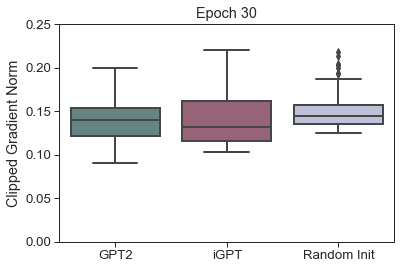

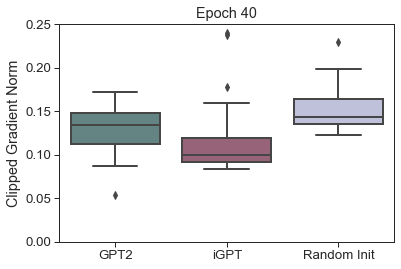

In [19]:
seed=666
epoch=20
env_name='hopper'
reward_state_action = 'state'

dataset_name = 'medium'
epoch_list = [0, 1, 2, 3, 10, 20, 30, 40]

grad_norms_epochs = []

for epoch in tqdm(epoch_list):
    grad_norms = np.load(f'results/gradnorms_{epoch}_gpt2_igpt_dt_{env_name}_{dataset_name}_{seed}_{reward_state_action}.npy').swapaxes(0, 1)
    model_name_label = ['GPT2', 'iGPT', 'Random Init']
    colors = [(0.372, 0.537, 0.537), (0.627, 0.352, 0.470), (0.733, 0.737, 0.870)]
    my_palette = sns.color_palette(colors)
    sns.boxplot(data=grad_norms, palette=my_palette)  # "PuBuGn_r"
    plt.xticks(np.arange(3), model_name_label)
    plt.ylabel('Clipped Gradient Norm')
    plt.ylim(top=0.25, bottom=0)
    plt.title(f'Epoch {epoch}')
    plt.savefig(f'figs/gradnorms_{epoch}_gpt2_igpt_dt_{env_name}_{dataset_name}_{seed}_{reward_state_action}.pdf')
    plt.show()

    grad_norms_epochs.append(grad_norms)

In [16]:
grad_norms_mean_gpt2 = []
grad_norms_std_gpt2 = []
grad_norms_mean_igpt = []
grad_norms_std_igpt = []
grad_norms_mean_dt = []
grad_norms_std_dt = []
for epoch, grad_norms in enumerate(grad_norms_epochs[:4]):
    grad_norms_mean_gpt2.append(grad_norms[0].mean())
    grad_norms_std_gpt2.append(grad_norms[0].std())
    grad_norms_mean_igpt.append(grad_norms[1].mean())
    grad_norms_std_igpt.append(grad_norms[1].std())
    grad_norms_mean_dt.append(grad_norms[2].mean())
    grad_norms_std_dt.append(grad_norms[2].std())
grad_norms_mean_gpt2 = np.array(grad_norms_mean_gpt2)
grad_norms_std_gpt2 = np.array(grad_norms_std_gpt2)
grad_norms_mean_igpt = np.array(grad_norms_mean_igpt)
grad_norms_std_igpt = np.array(grad_norms_std_igpt)
grad_norms_mean_dt = np.array(grad_norms_mean_dt)
grad_norms_std_dt = np.array(grad_norms_std_dt)

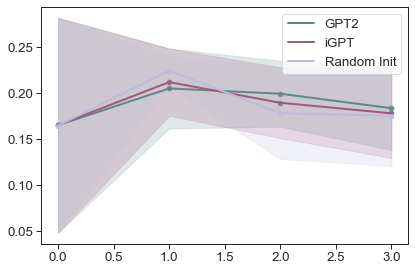

In [17]:
plt.fill_between(np.arange(len(grad_norms_mean_gpt2)), grad_norms_mean_gpt2 - grad_norms_std_gpt2, grad_norms_mean_gpt2 + grad_norms_std_gpt2, alpha=0.2, color=(0.372, 0.537, 0.537))
plt.plot(grad_norms_mean_gpt2, color=(0.372, 0.537, 0.537), label='GPT2')
plt.scatter(np.arange(len(grad_norms_mean_gpt2)), grad_norms_mean_gpt2, color=(0.372, 0.537, 0.537))

plt.fill_between(np.arange(len(grad_norms_mean_igpt)), grad_norms_mean_igpt - grad_norms_std_igpt, grad_norms_mean_igpt + grad_norms_std_igpt, alpha=0.2, color=(0.627, 0.352, 0.470))
plt.plot(grad_norms_mean_igpt, color=(0.627, 0.352, 0.470), label='iGPT')
plt.scatter(np.arange(len(grad_norms_mean_igpt)), grad_norms_mean_igpt, color=(0.627, 0.352, 0.470))

plt.fill_between(np.arange(len(grad_norms_mean_dt)), grad_norms_mean_dt - grad_norms_std_dt, grad_norms_mean_dt + grad_norms_std_dt, alpha=0.2, color=(0.733, 0.737, 0.870))
plt.plot(grad_norms_mean_dt, color=(0.733, 0.737, 0.870), label='Random Init')
plt.scatter(np.arange(len(grad_norms_mean_dt)), grad_norms_mean_dt, color=(0.733, 0.737, 0.870))

plt.legend()
plt.tight_layout()
plt.show()